In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


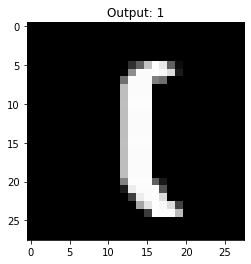

In [3]:
i = np.random.randint(0, 60000)
plt.imshow(x_train[i], cmap='gray')
plt.title(f'Output: {y_train[i]}')
plt.show()

In [4]:
# Normalize the data (Helps to converge in lesser time)
x_train = x_train/255
x_test = x_test/255

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape)) # Only for images
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2128 - accuracy: 0.9374 - val_loss: 0.1105 - val_accuracy: 0.9695
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0839 - accuracy: 0.9748 - val_loss: 0.0914 - val_accuracy: 0.9717
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0724 - val_accuracy: 0.9793
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0764 - val_accuracy: 0.9808
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0690 - val_accuracy

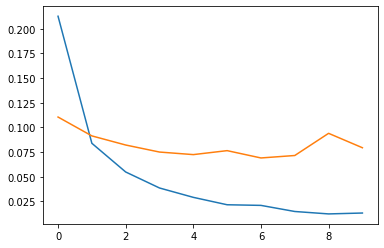

In [9]:
pd.Series(history.history['loss']).plot(kind='line')
pd.Series(history.history['val_loss']).plot(kind='line')

In [10]:
# Evaluating for test data

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9804


[0.08544114977121353, 0.980400025844574]

In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 970,    0,    3,    0,    1,    2,    3,    1,    5,    2],
       [   1, 1129,    2,    0,    1,    0,    2,    4,    1,    4],
       [   1,    1, 1005,    1,    1,    0,    0,    5,    3,    0],
       [   0,    1,    3,  993,    1,    3,    1,    1,    8,    7],
       [   2,    0,    3,    0,  967,    2,    4,    4,    5,   12],
       [   1,    0,    1,    6,    0,  877,    3,    0,    4,    4],
       [   3,    1,    2,    0,    4,    4,  945,    0,    2,    0],
       [   0,    0,    5,    5,    1,    0,    0, 1002,    3,    1],
       [   1,    3,    8,    2,    0,    2,    0,    4,  940,    3],
       [   1,    0,    0,    3,    6,    2,    0,    7,    3,  976]])

In [17]:
tf.keras.models.save_model(model, 'output_digits.h5')

In [15]:
op = model.predict(x_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 17ms/step


In [16]:
op = np.argmax(op)
op

7

'2.9.2'